In [1]:
 #Predicting House Prices using Regression Models
# using california housing dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [3]:
# Check for missing values
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


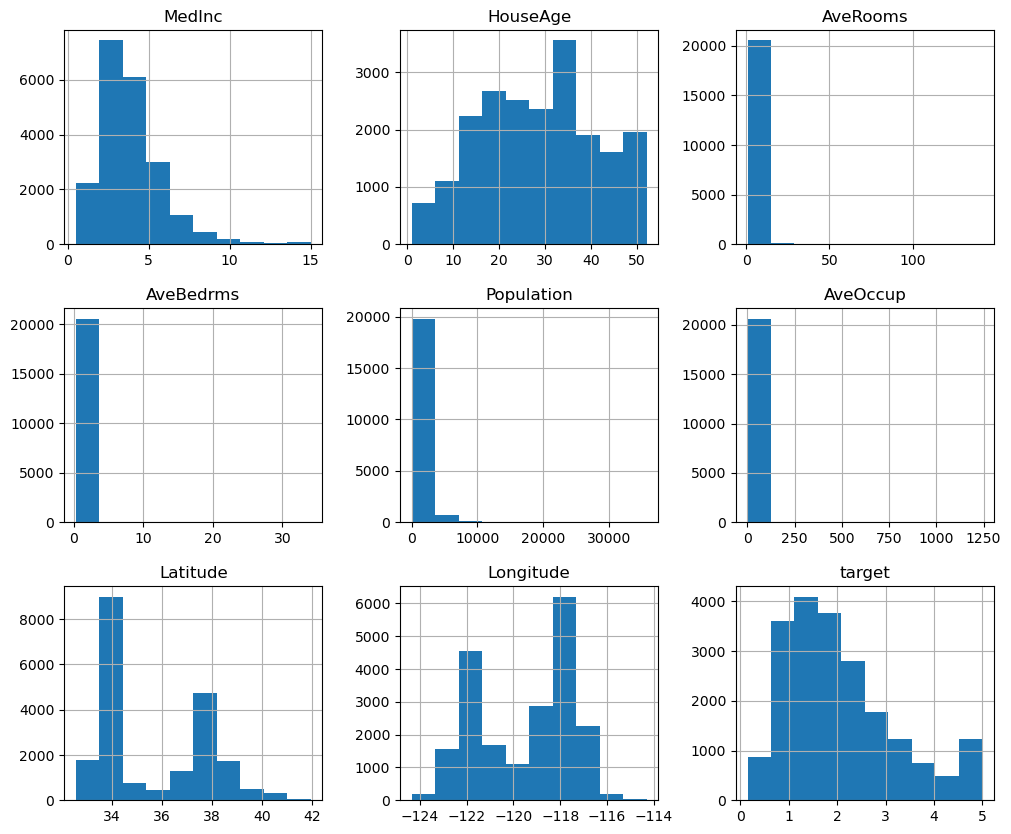

In [5]:
# Visualize the data using histograms
df.hist(figsize=(12, 10))
plt.show()


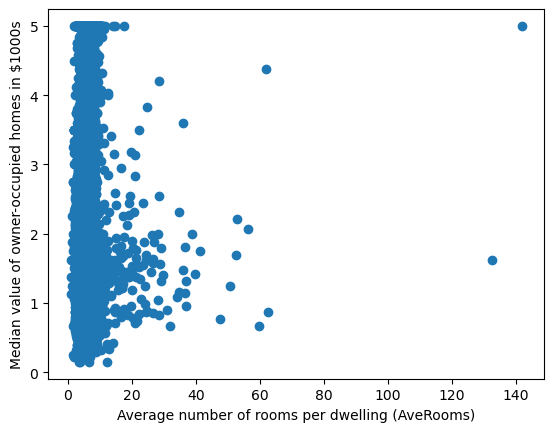

In [6]:
# Visualize the data using scatter plots
plt.scatter(df['AveRooms'], df['target'])
plt.xlabel('Average number of rooms per dwelling (AveRooms)')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

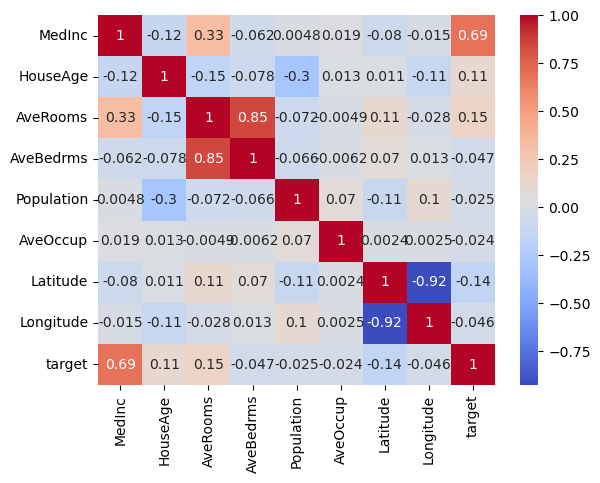

In [7]:
# Visualize the data using a correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#implement the following regression models:
Simple Linear Regression (choose an appropriate feature)
Multiple Linear Regression
Polynomial Regression
Ridge Regression
Lasso Regression
Support Vector Regression
Decision Tree Regression
Random Forest Regressio

In [10]:
# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, rmse, r2

In [11]:
# Implement Simple Linear Regression
simple_lr = LinearRegression()
simple_lr.fit(X_train[:, np.newaxis, 5], y_train) # Using the 'RM' feature (column index 5)
simple_lr_metrics = evaluate_model(simple_lr, X_test[:, np.newaxis, 5], y_test)

In [12]:
# Implement Multiple Linear Regression
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)
multiple_lr_metrics = evaluate_model(multiple_lr, X_test, y_test)

In [13]:
# Implement Polynomial Regression (use the same Linear Regression model with transformed features)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
poly_lr_metrics = evaluate_model(poly_lr, X_test_poly, y_test)

In [14]:
# Implement Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_metrics = evaluate_model(ridge, X_test, y_test)


In [15]:
# Implement Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_metrics = evaluate_model(lasso, X_test, y_test)


In [16]:
# Implement Support Vector Regression
svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train, y_train)
svr_metrics = evaluate_model(svr, X_test, y_test)
# Implement Decision Tree Regression
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_metrics = evaluate_model(dtree,
X_test, y_test)

In [17]:
# Implement Random Forest Regression
rforest = RandomForestRegressor(n_estimators=100)
rforest.fit(X_train, y_train)
rforest_metrics = evaluate_model(rforest, X_test, y_test)


In [31]:
# Random Forest example
import random
from random import randint

param_dist = {
    'n_estimators':[20, 50, 100, 200],
    'max_depth':[1,5,10,20,25,30],
    'min_samples_split':[2,4,6,8,10]
}

rforest = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rforest, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:", random_search.best_params_)
print("Best score for Random Forest:", -random_search.best_score_)


Best hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 30}
Best score for Random Forest: 0.2607534848774061


In [32]:
# Retrain the model with the best hyperparameters
best_rforest = random_search.best_estimator_
best_rforest.fit(X_train, y_train)
best_rforest_metrics = evaluate_model(best_rforest, X_test, y_test)


In [33]:
# Collect the evaluation metrics for each model in a DataFrame
model_names = ['Simple LR', 'Multiple LR', 'Polynomial LR', 'Ridge', 'Lasso', 'SVR', 'Decision Tree', 'Random Forest', 'Tuned Random Forest']
metrics_list = [simple_lr_metrics, multiple_lr_metrics, poly_lr_metrics, ridge_metrics, lasso_metrics, svr_metrics, dtree_metrics, rforest_metrics, best_rforest_metrics]

results = pd.DataFrame(metrics_list, columns=['MAE', 'MSE', 'RMSE', 'R2'], index=model_names)
print(results)

                          MAE       MSE      RMSE        R2
Simple LR            0.905627  1.309645  1.144397  0.000583
Multiple LR          0.533200  0.555892  0.745581  0.575788
Polynomial LR        0.467001  0.464301  0.681397  0.645682
Ridge                0.533204  0.555803  0.745522  0.575855
Lasso                0.581607  0.613512  0.783270  0.531817
SVR                  0.590038  0.629607  0.793478  0.519534
Decision Tree        0.457780  0.505871  0.711246  0.613959
Random Forest        0.325597  0.252889  0.502881  0.807015
Tuned Random Forest  0.327173  0.254693  0.504672  0.805638


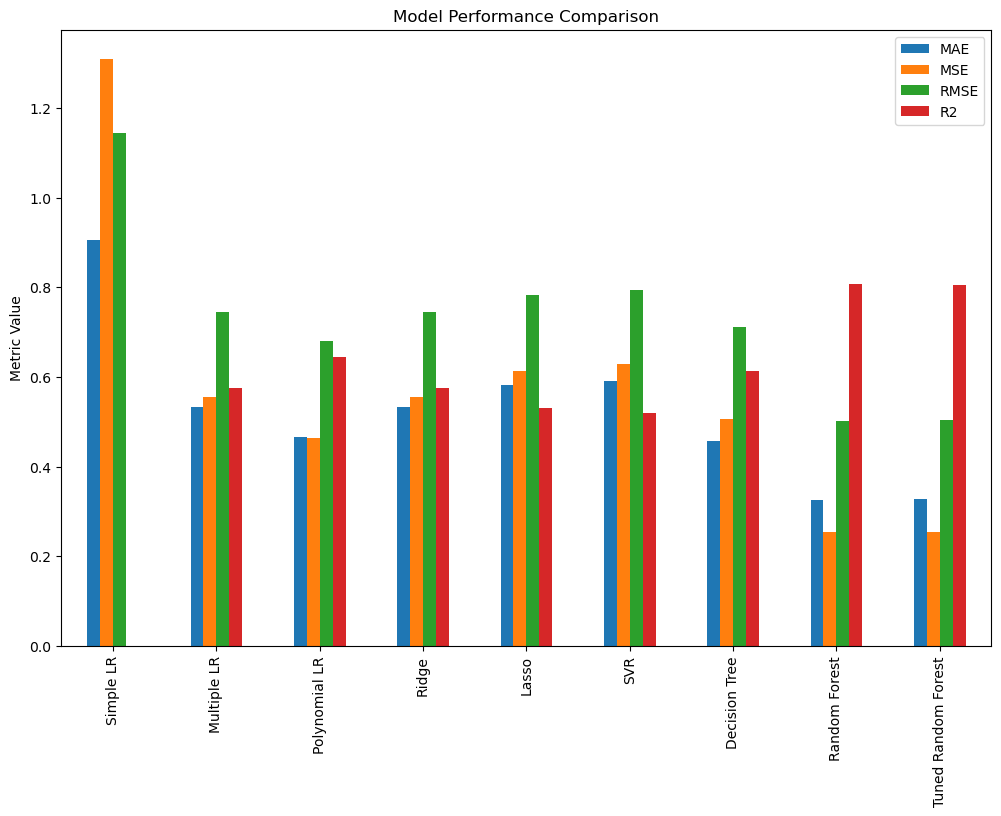

In [34]:
# Visualize the performance of each model using a bar plot
results.plot(kind='bar', figsize=(12, 8), ylabel='Metric Value', title='Model Performance Comparison')
plt.show()

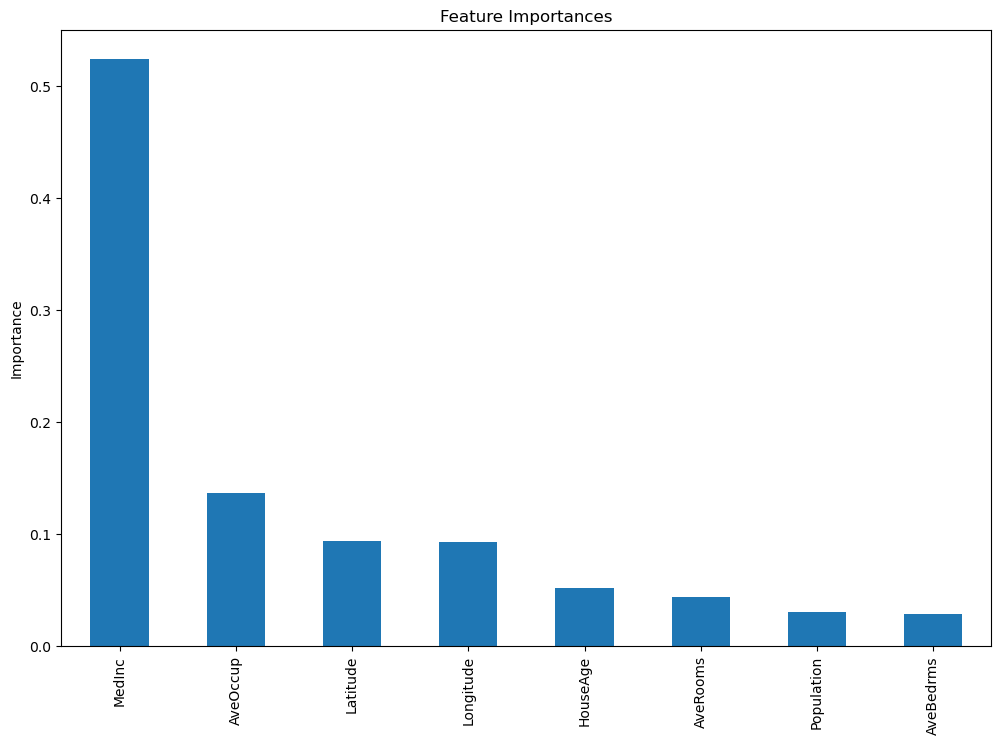

In [35]:
# Select the best model (e.g., tuned random forest)
best_model = best_rforest

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Analyze feature importances for the Random Forest model
importances = best_model.feature_importances_
feature_importances = pd.Series(importances, index=housing.feature_names)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), ylabel='Importance', title='Feature Importances')
plt.show()